In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [5]:
data=pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [6]:
#univarite timeseries
# 2019-22 data
stock_data=data[["Date","Close"]]


In [7]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
# changing data datatype into datatime format
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

C:\Users\asus\AppData\Local\Temp\ipykernel_24832\2428514448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data["Date"])


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
stock_data = stock_data.set_index('Date')

In [12]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## EDA

In [13]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


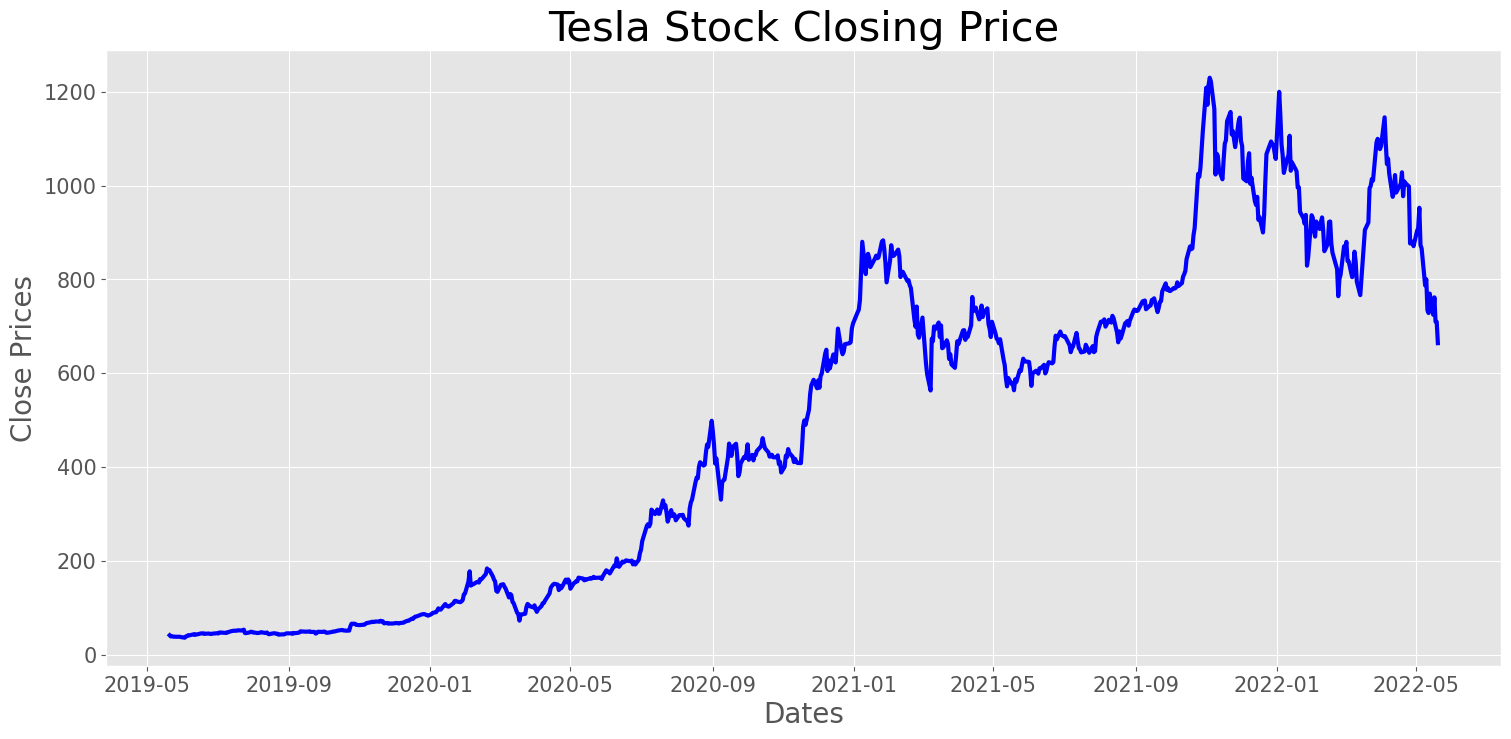

In [14]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

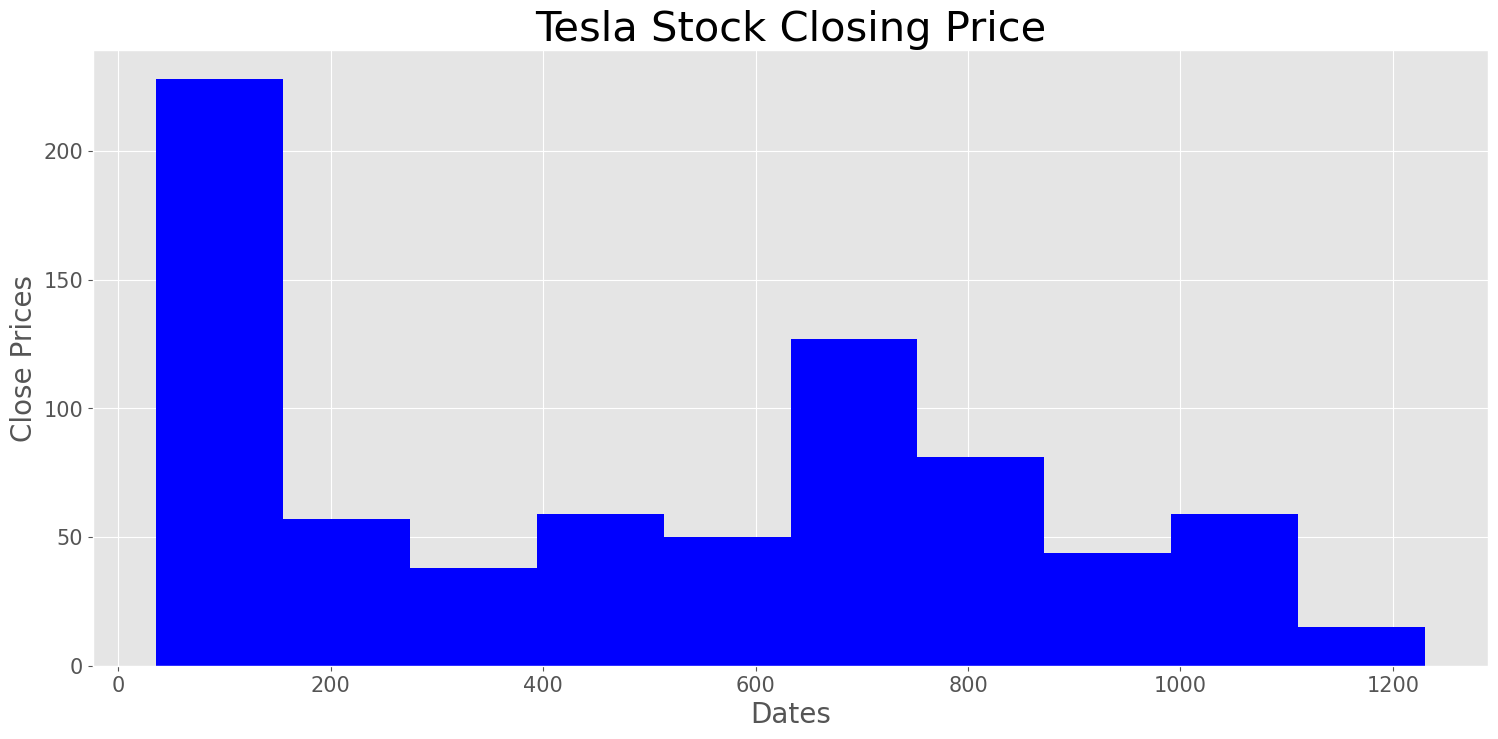

In [15]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

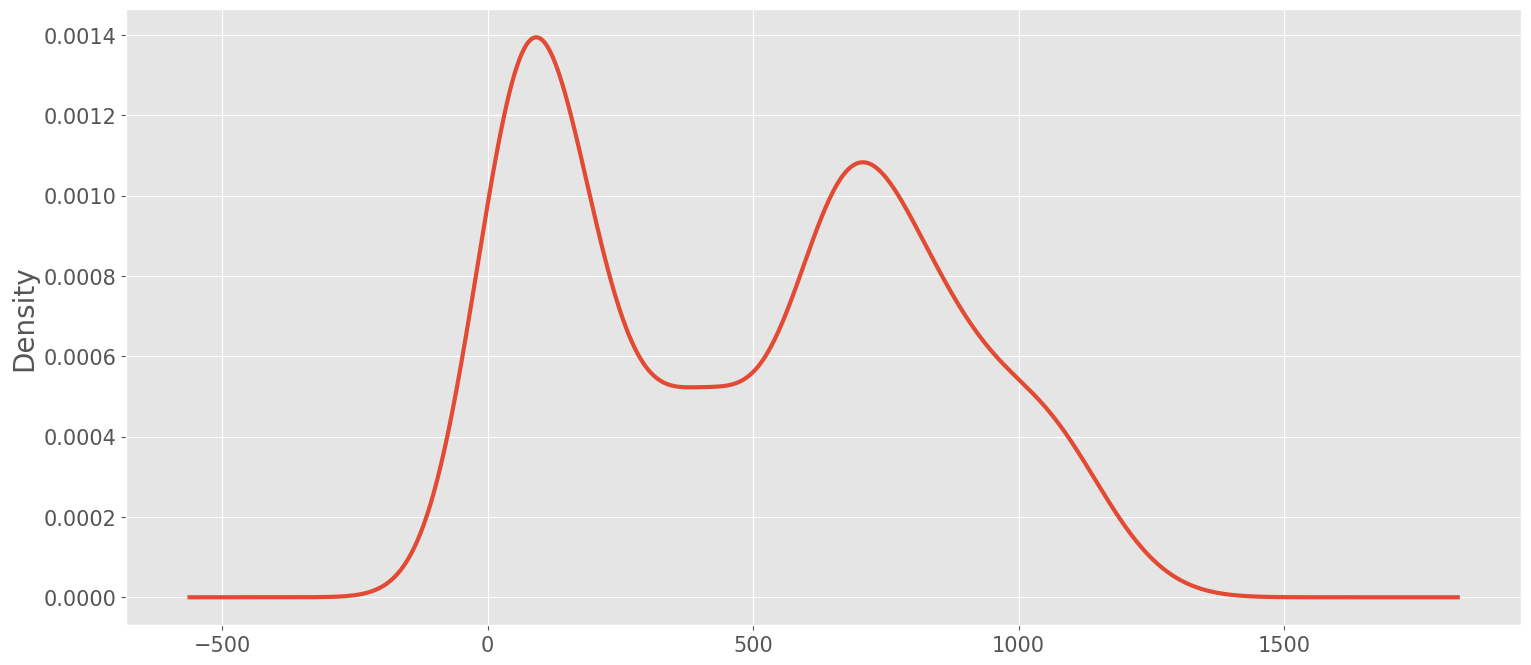

In [16]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [17]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller

In [18]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

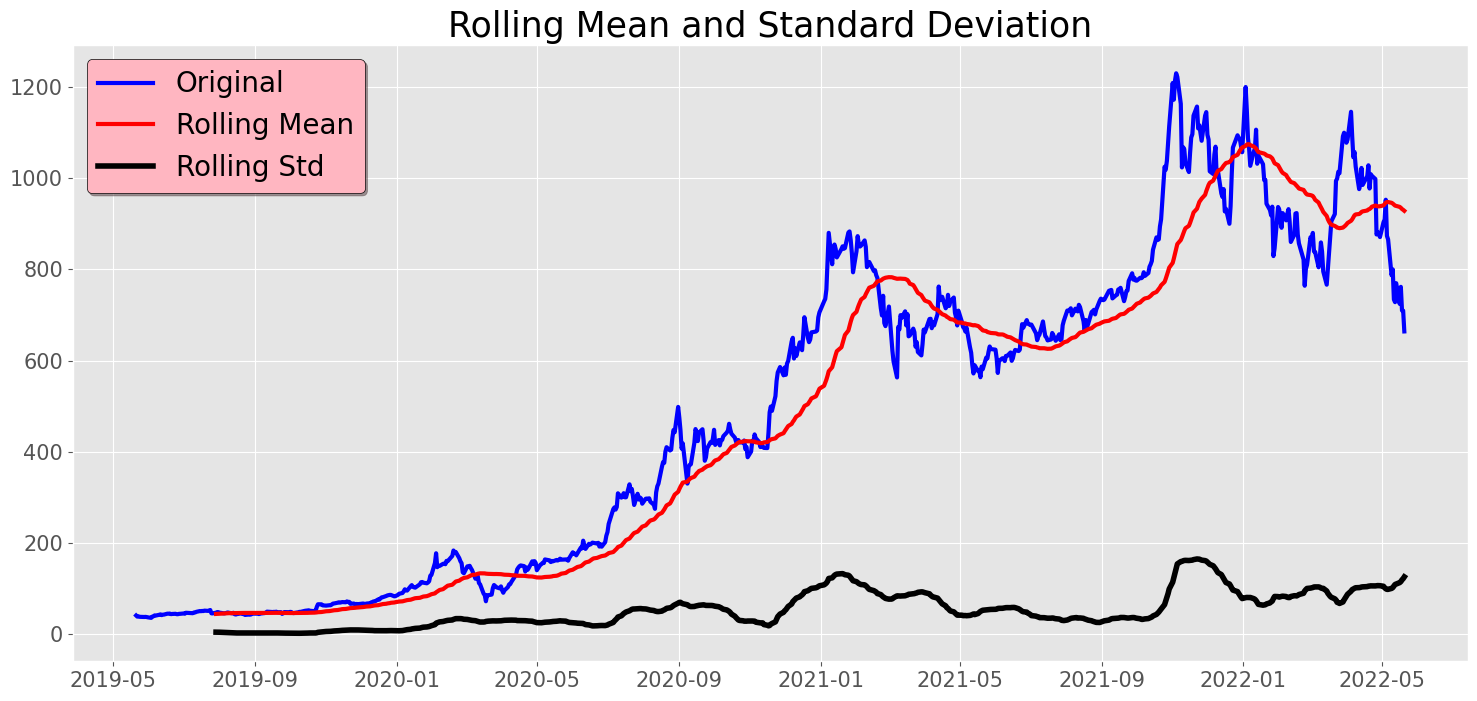

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [19]:
test_stationarity(stock_data.Close)

- roll mean is not smooth so we can conclude that this data is not stationary.
- as p_value > .05(signifincance level) thus we can conclude that data is not stationary.

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=252,model="multiplicative")

<Figure size 2000x1000 with 0 Axes>

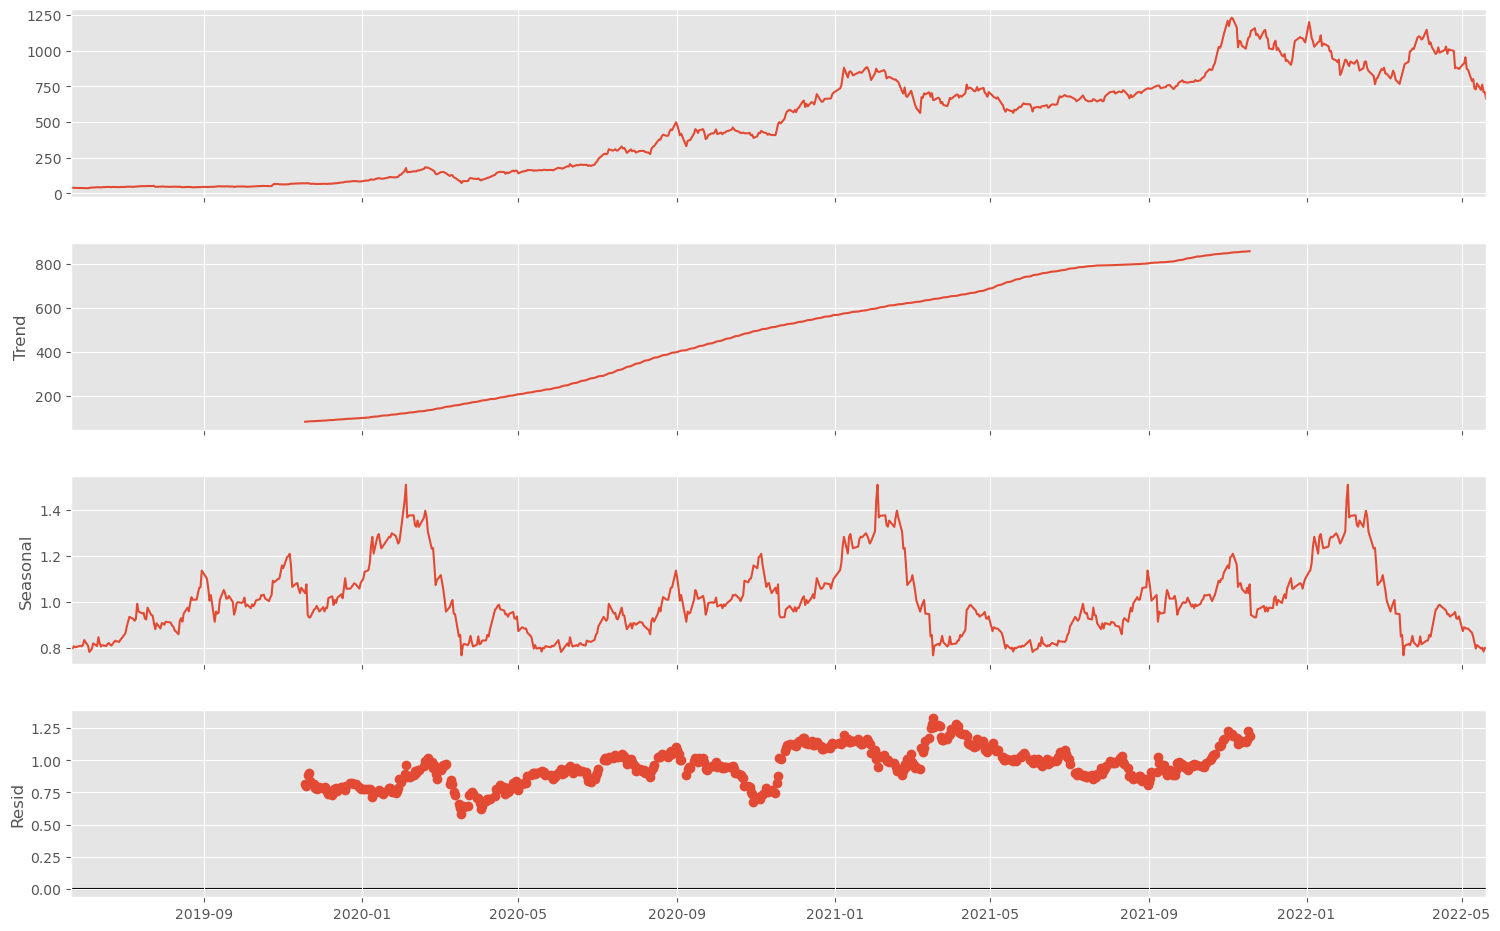

In [21]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

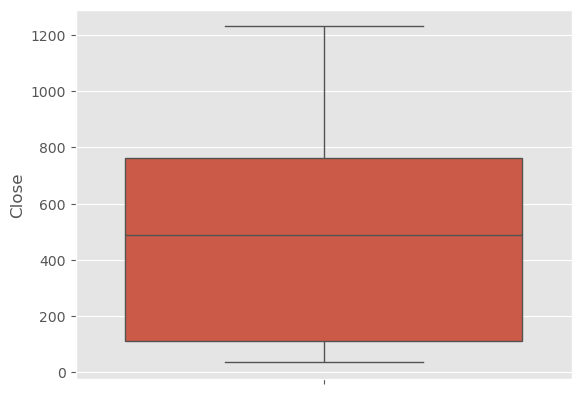

In [22]:
import seaborn as sns
sns.boxplot(stock_data.Close)

## Preprocessing of data

In [23]:
stock_data['Second Difference']=stock_data['Close'].diff(2)

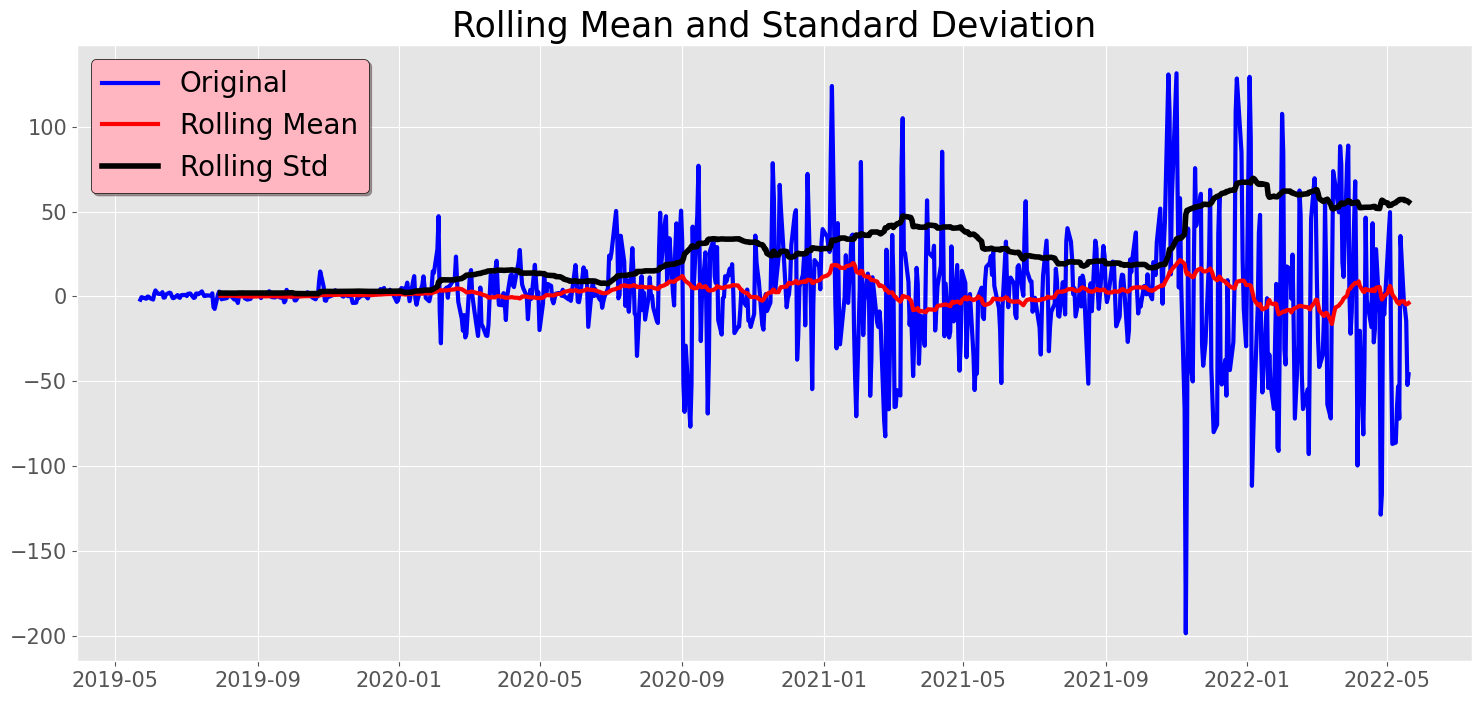

Results of dickey fuller test
Test Statistics               -6.027267e+00
p-value                        1.445919e-07
No. of lags used               1.700000e+01
Number of observations used    7.380000e+02
critical value (1%)           -3.439242e+00
critical value (5%)           -2.865464e+00
critical value (10%)          -2.568860e+00
dtype: float64


In [24]:
test_stationarity(stock_data['Second Difference'].dropna())

In [25]:
stock_data.head()

,Close,Second Difference
Date,,
2019-05-21,41.015999,NaN
2019-05-22,38.546001,NaN
2019-05-23,39.098000,-1.917999
2019-05-24,38.125999,-0.420002
2019-05-28,37.740002,-1.357998


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

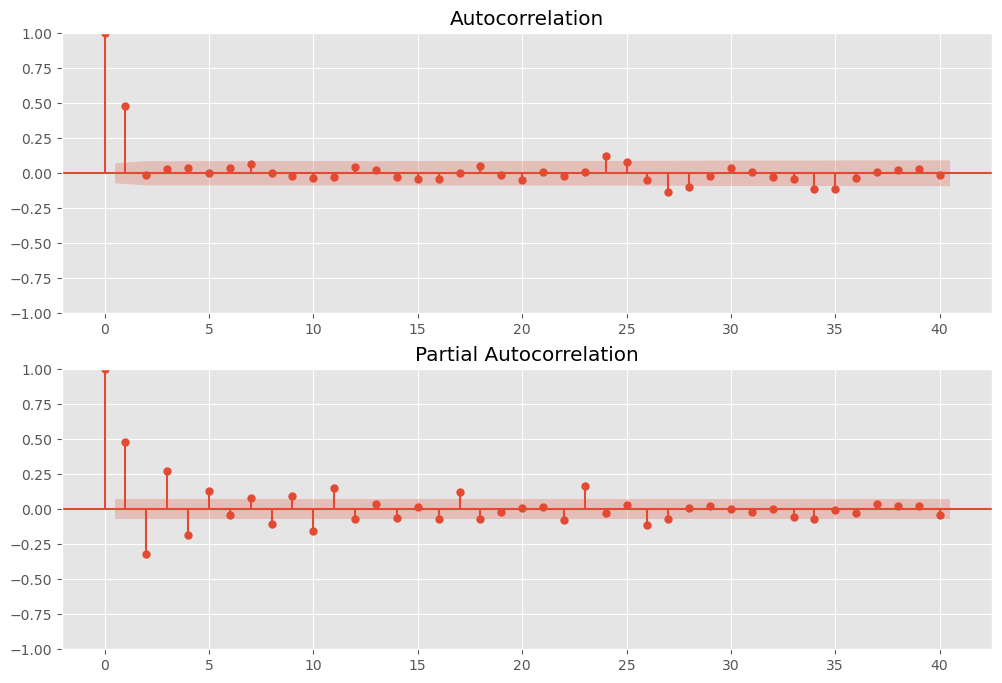

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_data['Second Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_data['Second Difference'].dropna(),lags=40,ax=ax2)

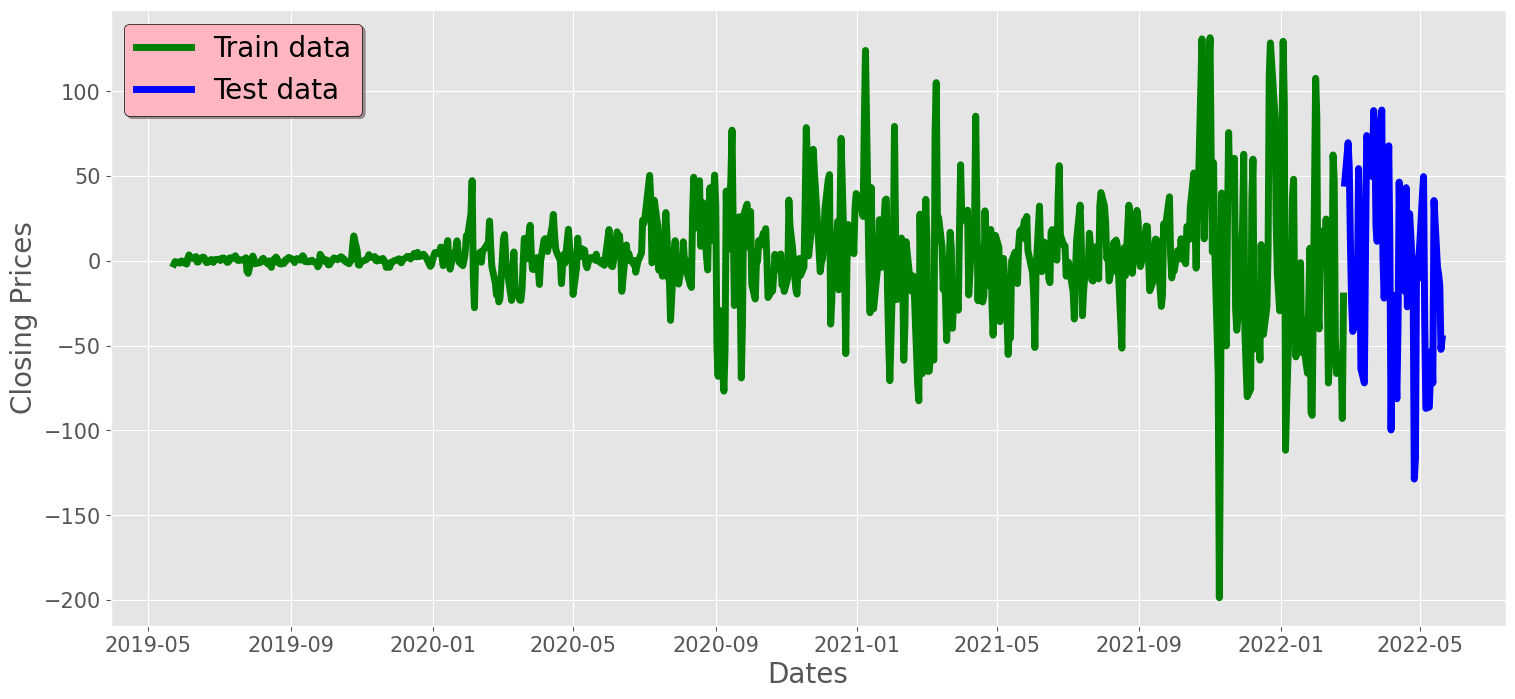

In [28]:
#split data into train and test data
train_data=stock_data['Second Difference'].iloc[0:-60]
test_data=stock_data['Second Difference'].iloc[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [31]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset=dataset.astype('float32')
    best_score, best_cfg=float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=train_arima_model(dataset, test, order)
                    if rmse<best_score:
                        best_score, best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' %(best_cfg,best_score))

In [32]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=53.825
ARIMA(0, 0, 1) RMSE=39.625
ARIMA(0, 0, 2) RMSE=39.605
ARIMA(0, 1, 0) RMSE=51.467
ARIMA(0, 1, 1) RMSE=53.737
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=72.513
ARIMA(0, 2, 1) RMSE=51.504
ARIMA(0, 2, 2) RMSE=57.619
ARIMA(1, 0, 0) RMSE=45.519
ARIMA(1, 0, 1) RMSE=39.592
ARIMA(1, 0, 2) RMSE=39.984
ARIMA(1, 1, 0) RMSE=51.599
ARIMA(1, 1, 1) RMSE=45.509
ARIMA(1, 1, 2) RMSE=39.586
ARIMA(1, 2, 0) RMSE=70.288
ARIMA(1, 2, 1) RMSE=51.631
ARIMA(1, 2, 2) RMSE=46.235
ARIMA(2, 0, 0) RMSE=43.350
ARIMA(2, 0, 1) RMSE=39.781
ARIMA(2, 0, 2) RMSE=39.783
ARIMA(2, 1, 0) RMSE=45.402
ARIMA(2, 1, 2) RMSE=39.726
ARIMA(2, 2, 0) RMSE=57.059
ARIMA(2, 2, 1) RMSE=45.431
ARIMA(2, 2, 2) RMSE=45.847
Best ARIMA(1, 1, 2) RMSE=39.586


In [33]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(1,1,2))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.586048938489654


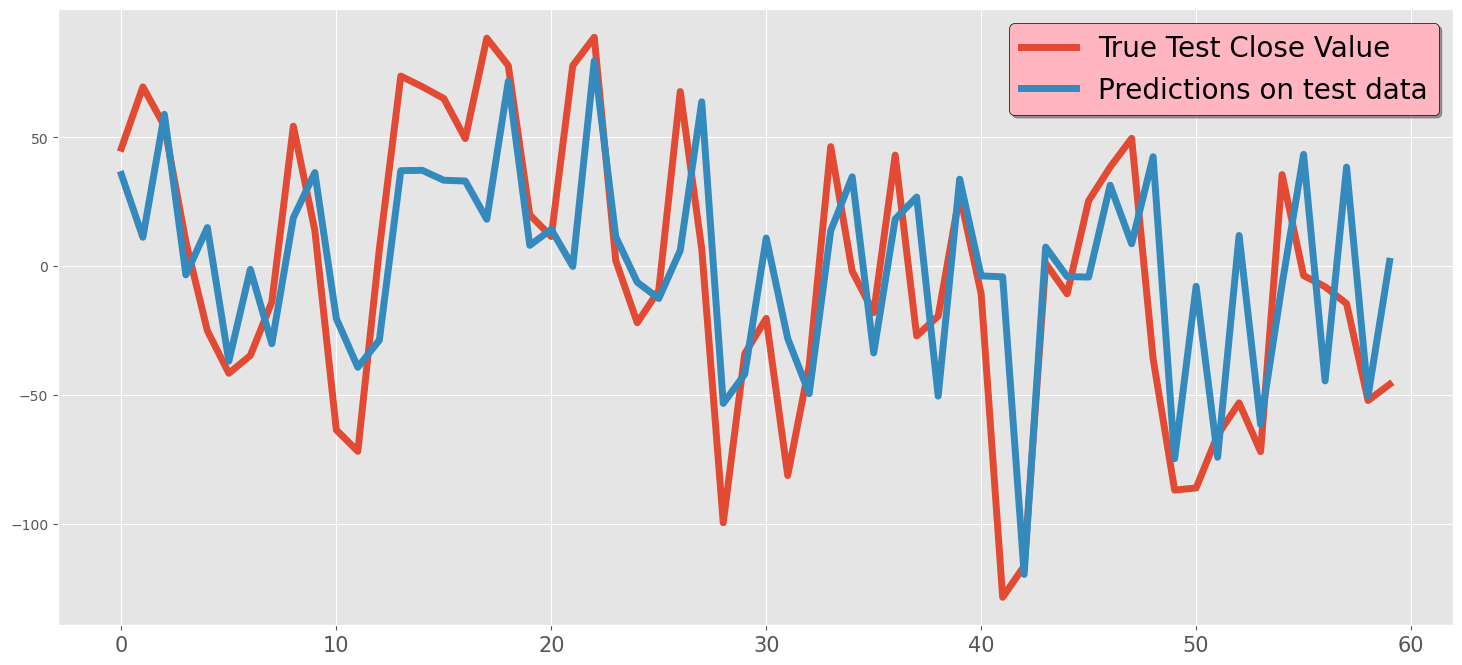

In [34]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [35]:
fc_series = pd.Series(predictions, index=test_data.index)

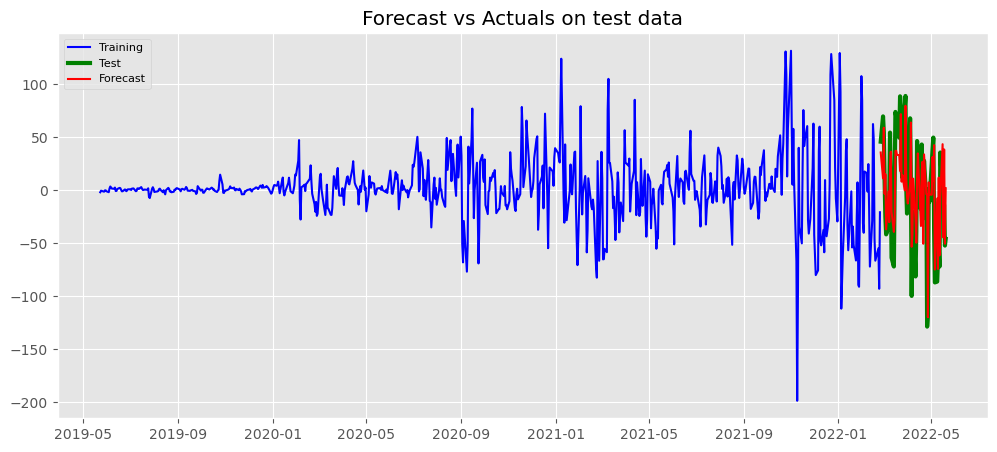

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

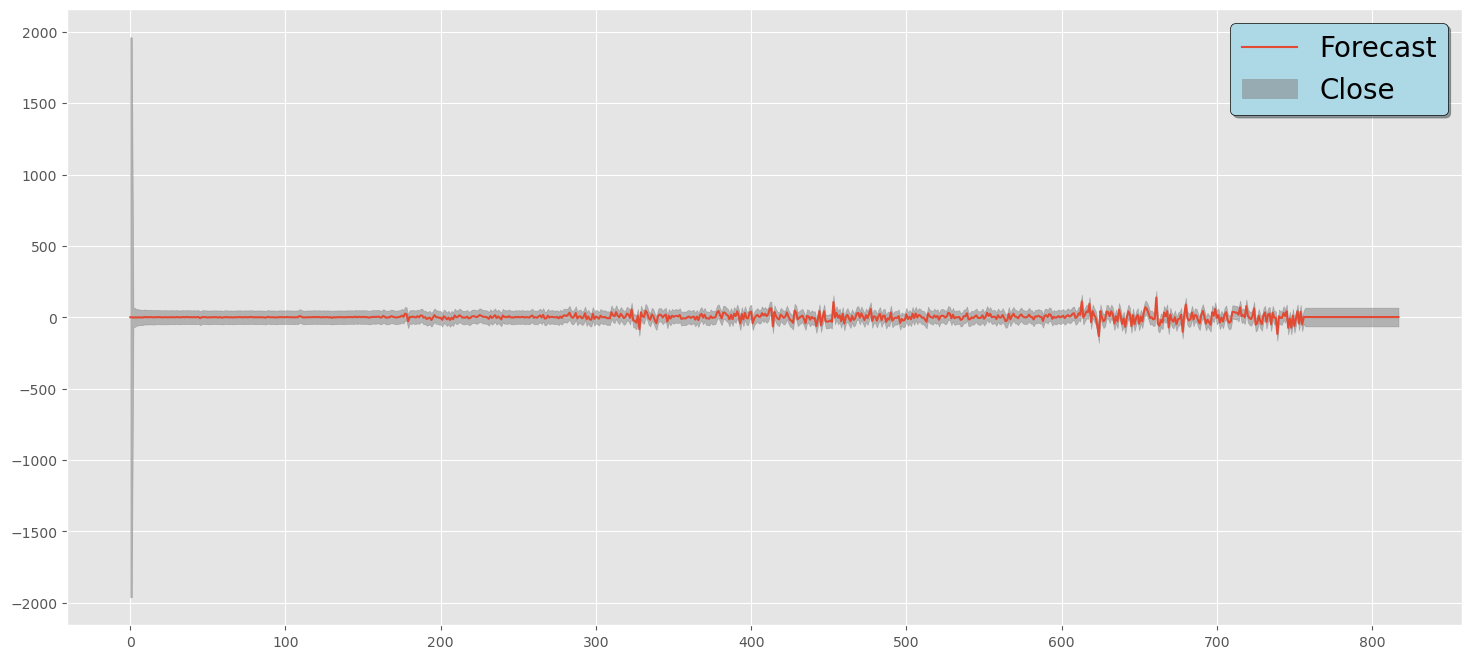

In [37]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(stock_data['Second Difference'])+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [38]:
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history,order=(1,1,2), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.60706111892097


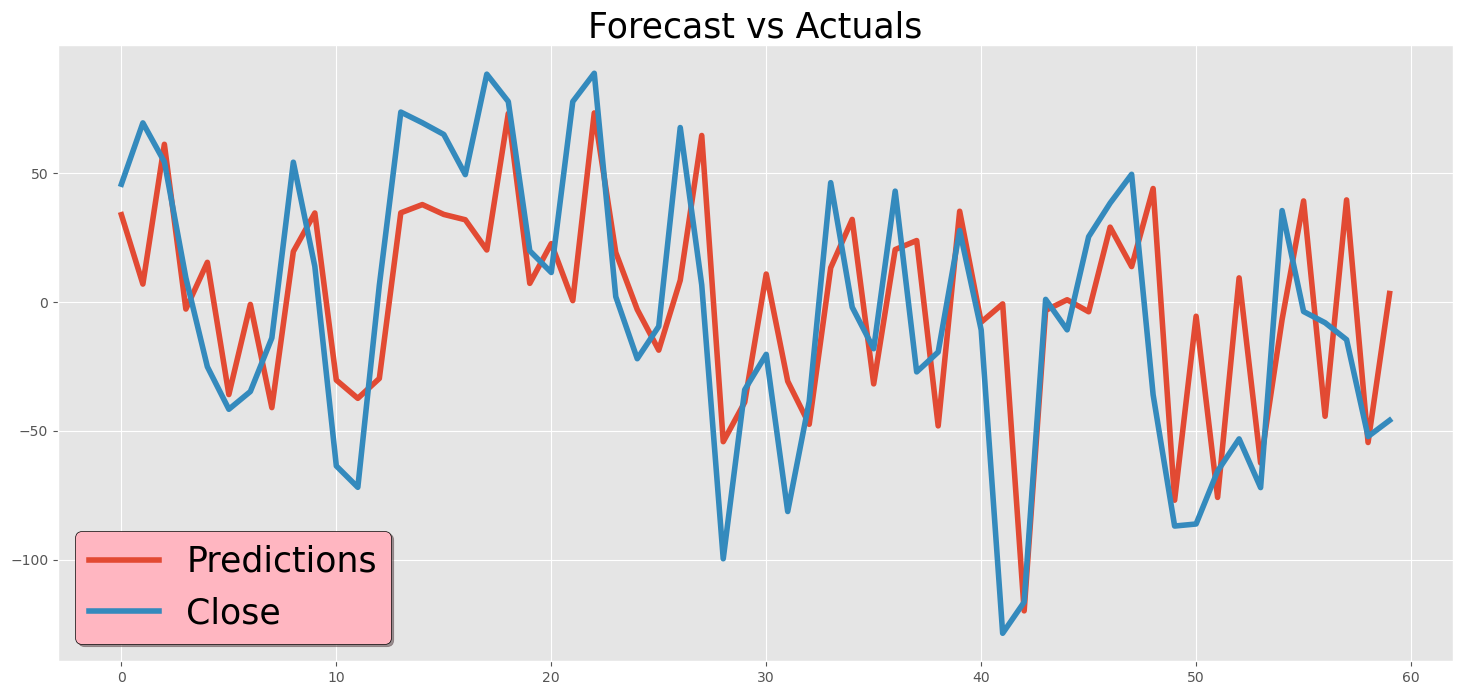

In [39]:
# Plot
plt.figure(figsize=(18,8))
plt.plot(range(60), predictions, label='Predictions', linewidth = 4)
plt.plot(range(60), test_data, label='Close', linewidth = 4)
plt.title('Forecast vs Actuals', fontsize = 25)
plt.legend(fontsize = 25, shadow = True, facecolor = 'lightpink', edgecolor = 'k')
